Info Links: https://code.visualstudio.com/docs/python/jupyter-support  
https://stackoverflow.com/questions/35226904/convert-spanish-date-in-string-format  
https://stackabuse.com/how-to-format-dates-in-python/  
Dateparser docs:https://dateparser.readthedocs.io/en/latest/


## Imports the necessary libraries

In [1]:
import os
import pandas as pd
import numpy as np

In [2]:
# Gets all the files from the dir
baseDir = r"C:\\Users\\robin\\Google Drive\\WORK\\ExcelsStuff\\files"
fileNames = []
for filename in os.listdir(baseDir):
    if(filename.startswith('~$')):
        continue
    fileNames.append(filename)
fileNames

['Dic312019.xlsx', 'Ene022020.xlsx']

## Reads each excel file and saves all the sheets into a list with the specified columns

In [3]:

dfs = []
COLS = ["RAT","OPERATOR","CHANNEL","IMEI","IMSI","TMSI",
        "MS POWER","TA","LAST LAC","NAME","HITS","DATE-TIME"]
for filename in fileNames:
    # dfs.append(pd.read_excel(f"{baseDir}\\{filename}"))
    temd_dfs = [pd.read_excel(f"{baseDir}\\{filename}", sheet_name=0, usecols=COLS), #2G
                pd.read_excel(f"{baseDir}\\{filename}", sheet_name=1, usecols=COLS), #3G
                pd.read_excel(f"{baseDir}\\{filename}", sheet_name=2, usecols=COLS)] #4G
    dfs.append(temd_dfs)
len(dfs)

2

In [4]:
dfs[0][0].head()

,RAT,OPERATOR,CHANNEL,IMSI,IMEI,TMSI,MS POWER,TA,LAST LAC,NAME,HITS,DATE-TIME
0,2G,EC-Claro(América Móvil)-01,144,740020170411491,359459077681588,FFFFFFFF,-61,0,65534,NaN,1,mi. ene. 1 03:05:16 2020
1,2G,EC-Claro(América Móvil)-01,144,740010164127419,357815081319451,FFFFFFFF,-62,0,65534,NaN,1,mi. ene. 1 03:04:51 2020
2,2G,EC-Claro(América Móvil)-01,144,740010177429066,863697045358438,151D1A53,-66,0,50134,NaN,1,mi. ene. 1 02:55:06 2020
3,2G,EC-Claro(América Móvil)-01,144,740010120727910,357084081525001,97155956,-62,0,10228,NaN,1,mi. ene. 1 02:54:44 2020
4,2G,EC-Claro(América Móvil)-01,144,740010180400328,358099104079272,FFFFFFFF,-64,0,65534,NaN,1,mi. ene. 1 02:37:15 2020


In [5]:
# The dfs[0] means the excel file at index 0 with the 3 pages as dataframes
len(dfs[0])
# The fisrt index is a list of dataframes that has everydataframe

3

In [6]:
len([df for dflist in dfs for df in dflist])

6

In [7]:
allData = pd.concat([df for dflist in dfs for df in dflist])
allData.info() # 3633-6 filas sin contar los headers

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3627 entries, 0 to 73
Data columns (total 12 columns):
RAT          3627 non-null object
OPERATOR     3627 non-null object
CHANNEL      3627 non-null int64
IMSI         3524 non-null float64
IMEI         3528 non-null float64
TMSI         3528 non-null object
MS POWER     3627 non-null float64
TA           3627 non-null int64
LAST LAC     3627 non-null int64
NAME         0 non-null float64
HITS         3627 non-null int64
DATE-TIME    3627 non-null object
dtypes: float64(4), int64(4), object(4)
memory usage: 368.4+ KB


In [8]:
allData.head()

,RAT,OPERATOR,CHANNEL,IMSI,IMEI,TMSI,MS POWER,TA,LAST LAC,NAME,HITS,DATE-TIME
0,2G,EC-Claro(América Móvil)-01,144,7.400202e+14,3.594591e+14,FFFFFFFF,-61.0,0,65534,NaN,1,mi. ene. 1 03:05:16 2020
1,2G,EC-Claro(América Móvil)-01,144,7.400102e+14,3.578151e+14,FFFFFFFF,-62.0,0,65534,NaN,1,mi. ene. 1 03:04:51 2020
2,2G,EC-Claro(América Móvil)-01,144,7.400102e+14,8.636970e+14,151D1A53,-66.0,0,50134,NaN,1,mi. ene. 1 02:55:06 2020
3,2G,EC-Claro(América Móvil)-01,144,7.400101e+14,3.570841e+14,97155956,-62.0,0,10228,NaN,1,mi. ene. 1 02:54:44 2020
4,2G,EC-Claro(América Móvil)-01,144,7.400102e+14,3.580991e+14,FFFFFFFF,-64.0,0,65534,NaN,1,mi. ene. 1 02:37:15 2020


### Returns a datetime object from a string representation

In [9]:
def getMonthInt(strMonth):
    if(strMonth.lower() in ["ene"]):
        return 1
    elif(strMonth.lower() in ["feb"]):
        return 2
    elif(strMonth.lower() in ["mar"]):
        return 3
    elif(strMonth.lower() in ["abr"]):
        return 4
    elif(strMonth.lower() in ["may"]):
        return 5
    elif(strMonth.lower() in ["jun"]):
        return 6
    elif(strMonth.lower() in ["jul"]):
        return 7
    elif(strMonth.lower() in ["ago"]):
        return 8
    elif(strMonth.lower() in ["sep"]):
        return 9
    elif(strMonth.lower() in ["oct"]):
        return 10
    elif(strMonth.lower() in ["nov"]):
        return 11
    elif(strMonth.lower() in ["dic"]):
        return 12

def toDatetime(dateStr):
    # Date string example-> ma. dic. 31 23:50:11 2019
    _, month,t_year = list(map(str.strip, dateStr.split('.')))
    day, t, year = t_year.split(' ') 
    month = getMonthInt(month)
    dateStr = f"{year}-{month}-{day} {t}"
    return pd.to_datetime(dateStr, format="%Y-%m-%d %X")
result = toDatetime("ma. dic. 31 23:50:11 2019")
print(result)
type(result)

2019-12-31 23:50:11


pandas._libs.tslibs.timestamps.Timestamp

In [10]:
allData['DATE-TIME'] = allData['DATE-TIME'].apply(toDatetime)
allData.head(2)

,RAT,OPERATOR,CHANNEL,IMSI,IMEI,TMSI,MS POWER,TA,LAST LAC,NAME,HITS,DATE-TIME
0,2G,EC-Claro(América Móvil)-01,144,7.400202e+14,3.594591e+14,FFFFFFFF,-61.0,0,65534,NaN,1,2020-01-01 03:05:16
1,2G,EC-Claro(América Móvil)-01,144,7.400102e+14,3.578151e+14,FFFFFFFF,-62.0,0,65534,NaN,1,2020-01-01 03:04:51


In [11]:
allData['DATE'] = pd.to_datetime(allData['DATE-TIME'], format="%Y-%m-%d").dt.date
allData['TIME'] = pd.to_datetime(allData['DATE-TIME']).dt.time
allData.sort_values(by=["DATE"], inplace=True, ascending=True)

In [12]:
allData.drop('DATE-TIME', axis=1, inplace=True)

In [13]:
allData.head(2)

,RAT,OPERATOR,CHANNEL,IMSI,IMEI,TMSI,MS POWER,TA,LAST LAC,NAME,HITS,DATE,TIME
724,3G,EC-Claro(América Móvil)-01,4387,7.400102e+14,8.612500e+14,BA129B0E,-94.0,3,50134,NaN,1,2019-12-31,15:24:18
292,3G,EC-Claro(América Móvil)-01,4387,7.400002e+14,3.517591e+14,A4C47315,-95.0,3,15251,NaN,1,2019-12-31,16:59:42


In [29]:
allData.groupby('RAT').count()

,OPERATOR,CHANNEL,IMSI,IMEI,TMSI,MS POWER,TA,LAST LAC,NAME,HITS,DATE,TIME
RAT,,,,,,,,,,,,
2G,1457,1457,1456,1457,1457,1457,1457,1457,0,1457,1457,1457
3G,2071,2071,1969,2071,2071,2071,2071,2071,0,2071,2071,2071
4G,99,99,99,0,0,99,99,99,0,99,99,99


In [173]:
allData.groupby('IMEI').count()

,RAT,OPERATOR,CHANNEL,IMSI,TMSI,MS POWER,TA,LAST LAC,NAME,HITS,DATE,TIME
IMEI,,,,,,,,,,,,
1.037300e+13,1,1,1,1,1,1,1,1,0,1,1,1
1.099701e+13,1,1,1,1,1,1,1,1,0,1,1,1
1.122300e+13,1,1,1,1,1,1,1,1,0,1,1,1
1.138700e+13,1,1,1,1,1,1,1,1,0,1,1,1
1.138800e+13,1,1,1,1,1,1,1,1,0,1,1,1
1.167201e+13,1,1,1,1,1,1,1,1,0,1,1,1
1.167201e+13,1,1,1,1,1,1,1,1,0,1,1,1
1.176901e+13,1,1,1,1,1,1,1,1,0,1,1,1
1.185101e+13,1,1,1,1,1,1,1,1,0,1,1,1


In [174]:
allData.groupby('IMEI').count()['IMSI']

IMEI
1.037300e+13     1
1.099701e+13     1
1.122300e+13     1
1.138700e+13     1
1.138800e+13     1
1.167201e+13     1
1.167201e+13     1
1.176901e+13     1
1.185101e+13     1
1.196900e+13     1
1.201701e+13     1
1.240101e+13     1
1.245600e+13     1
1.245601e+13     1
1.250400e+13     1
1.282101e+13     1
1.285901e+13     1
1.323600e+13     1
1.334400e+13     1
1.340100e+13     1
1.353701e+13     1
1.385201e+13     1
1.396101e+13     1
1.396101e+13     1
1.396101e+13     1
1.396101e+13     2
1.396101e+13     1
1.396101e+13     1
1.396101e+13     1
1.396101e+13     1
                ..
8.691700e+14     1
8.692310e+14     1
8.693960e+14     1
8.693960e+14     2
8.693960e+14     1
8.693960e+14     1
8.694280e+14     5
8.694560e+14     1
8.696220e+14     1
8.697940e+14     1
8.698100e+14     1
8.698230e+14     2
8.698230e+14     1
8.698230e+14     1
8.698230e+14     6
8.698230e+14     1
8.698230e+14     3
8.698230e+14    10
8.698230e+14     4
8.698240e+14     2
8.698240e+14     1
8.69969

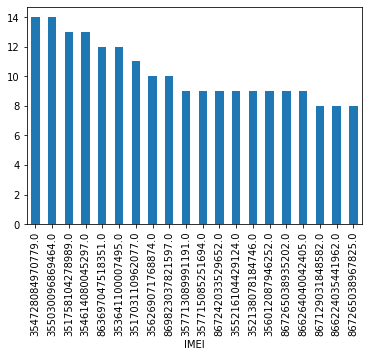

In [175]:
allData.groupby('IMEI').count()['IMSI'].sort_values(ascending=False).head(20).plot.bar()

In [177]:
def tiempoAvanceFilter(df, valuesList):
    """ Filters the df by the values on the TA column"""
    return df[df['TA'].isin(valuesList)]
tiempoAvance(allData, [1,2,3,4,5,6])

,RAT,OPERATOR,CHANNEL,IMSI,IMEI,TMSI,MS POWER,TA,LAST LAC,NAME,HITS,DATE,TIME
724,3G,EC-Claro(América Móvil)-01,4387,7.400102e+14,8.612500e+14,BA129B0E,-94.0,3,50134,NaN,1,2019-12-31,15:24:18
292,3G,EC-Claro(América Móvil)-01,4387,7.400002e+14,3.517591e+14,A4C47315,-95.0,3,15251,NaN,1,2019-12-31,16:59:42
291,3G,EC-Claro(América Móvil)-01,587,7.400002e+14,3.517591e+14,A4C47315,-105.0,3,15251,NaN,1,2019-12-31,17:00:04
290,3G,EC-Claro(América Móvil)-01,587,7.400102e+14,3.557471e+14,FC483124,-66.0,3,50134,NaN,1,2019-12-31,17:00:40
289,3G,EC-Claro(América Móvil)-01,4387,7.400102e+14,8.648850e+14,DA430032,-43.0,3,50134,NaN,1,2019-12-31,17:00:43
288,3G,EC-Claro(América Móvil)-01,4387,7.400102e+14,3.518361e+14,EC4B2029,-99.0,3,50132,NaN,1,2019-12-31,17:01:55
287,3G,EC-Claro(América Móvil)-01,587,7.400102e+14,3.537711e+14,F14E6924,-106.0,3,32769,NaN,1,2019-12-31,17:02:26
286,3G,EC-Claro(América Móvil)-01,4387,7.400102e+14,3.590441e+14,0,-96.0,3,65534,NaN,1,2019-12-31,17:02:44
285,3G,EC-Claro(América Móvil)-01,587,7.400102e+14,3.540721e+14,D949E9E8,-102.0,3,32769,NaN,4,2019-12-31,18:12:59
284,3G,EC-Claro(América Móvil)-01,4387,7.400202e+14,3.568121e+14,FF462065,-88.0,3,50134,NaN,1,2019-12-31,17:03:25


In [178]:
def msPowerRangeFilter(df, fromN, toN):
    """ Filters the df in the column MS POWER with the given boundaries"""
    return df[df['MS POWER'].between(fromN, toN)]
msPower(allData, -100, 60)

,RAT,OPERATOR,CHANNEL,IMSI,IMEI,TMSI,MS POWER,TA,LAST LAC,NAME,HITS,DATE,TIME
724,3G,EC-Claro(América Móvil)-01,4387,7.400102e+14,8.612500e+14,BA129B0E,-94.0,3,50134,NaN,1,2019-12-31,15:24:18
292,3G,EC-Claro(América Móvil)-01,4387,7.400002e+14,3.517591e+14,A4C47315,-95.0,3,15251,NaN,1,2019-12-31,16:59:42
290,3G,EC-Claro(América Móvil)-01,587,7.400102e+14,3.557471e+14,FC483124,-66.0,3,50134,NaN,1,2019-12-31,17:00:40
289,3G,EC-Claro(América Móvil)-01,4387,7.400102e+14,8.648850e+14,DA430032,-43.0,3,50134,NaN,1,2019-12-31,17:00:43
288,3G,EC-Claro(América Móvil)-01,4387,7.400102e+14,3.518361e+14,EC4B2029,-99.0,3,50132,NaN,1,2019-12-31,17:01:55
286,3G,EC-Claro(América Móvil)-01,4387,7.400102e+14,3.590441e+14,0,-96.0,3,65534,NaN,1,2019-12-31,17:02:44
284,3G,EC-Claro(América Móvil)-01,4387,7.400202e+14,3.568121e+14,FF462065,-88.0,3,50134,NaN,1,2019-12-31,17:03:25
283,3G,EC-Claro(América Móvil)-01,4387,7.400102e+14,3.556431e+14,E84DC2B5,-90.0,3,50134,NaN,1,2019-12-31,17:03:44
282,3G,EC-Claro(América Móvil)-01,4387,7.400102e+14,3.542631e+14,CF4D414B,-89.0,3,50134,NaN,1,2019-12-31,17:04:18
293,3G,EC-Claro(América Móvil)-01,4387,7.400102e+14,3.537711e+14,F14E6924,-95.0,3,32769,NaN,1,2019-12-31,16:59:19


In [179]:
def lastLacRangeFilter(df, fromN, toN):
    """ Filters the df in the column LAST LAC within the given boundaries"""
    return df[df['LAST LAC'].between(fromN, toN)]
lastLac(allData, -100, 60000)

,RAT,OPERATOR,CHANNEL,IMSI,IMEI,TMSI,MS POWER,TA,LAST LAC,NAME,HITS,DATE,TIME
724,3G,EC-Claro(América Móvil)-01,4387,7.400102e+14,8.612500e+14,BA129B0E,-94.0,3,50134,NaN,1,2019-12-31,15:24:18
292,3G,EC-Claro(América Móvil)-01,4387,7.400002e+14,3.517591e+14,A4C47315,-95.0,3,15251,NaN,1,2019-12-31,16:59:42
291,3G,EC-Claro(América Móvil)-01,587,7.400002e+14,3.517591e+14,A4C47315,-105.0,3,15251,NaN,1,2019-12-31,17:00:04
290,3G,EC-Claro(América Móvil)-01,587,7.400102e+14,3.557471e+14,FC483124,-66.0,3,50134,NaN,1,2019-12-31,17:00:40
289,3G,EC-Claro(América Móvil)-01,4387,7.400102e+14,8.648850e+14,DA430032,-43.0,3,50134,NaN,1,2019-12-31,17:00:43
288,3G,EC-Claro(América Móvil)-01,4387,7.400102e+14,3.518361e+14,EC4B2029,-99.0,3,50132,NaN,1,2019-12-31,17:01:55
287,3G,EC-Claro(América Móvil)-01,587,7.400102e+14,3.537711e+14,F14E6924,-106.0,3,32769,NaN,1,2019-12-31,17:02:26
285,3G,EC-Claro(América Móvil)-01,587,7.400102e+14,3.540721e+14,D949E9E8,-102.0,3,32769,NaN,4,2019-12-31,18:12:59
284,3G,EC-Claro(América Móvil)-01,4387,7.400202e+14,3.568121e+14,FF462065,-88.0,3,50134,NaN,1,2019-12-31,17:03:25
283,3G,EC-Claro(América Móvil)-01,4387,7.400102e+14,3.556431e+14,E84DC2B5,-90.0,3,50134,NaN,1,2019-12-31,17:03:44


In [157]:
def getHitsAmounForEmais(df, n=None):
    """ Gets the frecuency of each IMEI in the df and returns a n length series"""
    # return df.groupby('IMEI')['HITS'].sum().sort_values(ascending=False).head(n=n)
    return df.groupby('IMEI')['HITS'].transform(
        lambda x: sum(x)
    )
getFrecuencyForEmais(allData)

IMEI
3.533060e+14    944
3.517041e+14     96
3.567091e+14     70
8.662640e+14     66
3.525990e+14     55
3.562691e+14     54
3.583551e+14     50
3.537711e+14     49
3.560121e+14     47
8.679610e+14     46
3.537711e+14     45
8.671290e+14     43
3.550301e+14     43
3.567061e+14     43
3.537711e+14     38
8.698230e+14     38
3.583801e+14     37
3.571361e+14     37
3.517031e+14     36
3.580991e+14     36
8.658500e+14     36
8.679030e+14     34
3.546141e+14     33
8.661280e+14     32
3.526861e+14     32
3.592721e+14     31
3.552171e+14     30
3.546141e+14     30
3.541521e+14     30
8.668610e+14     30
               ... 
3.573931e+14      1
3.573641e+14      1
3.572871e+14      1
3.573621e+14      1
3.572871e+14      1
3.572871e+14      1
3.572871e+14      1
3.572871e+14      1
3.572871e+14      1
3.572871e+14      1
3.572871e+14      1
3.572871e+14      1
3.572871e+14      1
3.572871e+14      1
3.572871e+14      1
3.572871e+14      1
3.572871e+14      1
3.572871e+14      1
3.572891e+14   

In [224]:
def getUniqueNameIdColumn(df):
    """ Updates the NAME with a unique incremental KEY"""
    fn = lambda row: row['IMEI'].astype(str).apply(hash) + row['IMEI'].astype(str).apply(hash)
    return df.groupby('IMEI').apply(fn)
# Como asignarlo para que no de warning y SI lo pegue 
# df = df.assign(c=col.values) # assign values to column 'c'
getUniqueNameIdColumn(allData)

IMEI              
1.037300e+13  227    -3203862610629544534
1.099701e+13  373    -5112143828353066716
1.122300e+13  180    -2579475551719615558
1.138700e+13  204      197436923823930506
1.138800e+13  9       2117203569754925068
1.167201e+13  176     6104103556823448496
              902     5837713210161889728
1.176901e+13  229     3355254780473761604
1.185101e+13  41      1332949307110848882
1.196900e+13  914    -4816398315424918690
1.201701e+13  357    -8418292877267773006
1.240101e+13  383     3258326276731191220
1.245600e+13  495    -2767270954429182690
1.245601e+13  62     -7811301548466224242
1.250400e+13  66      2135253910666065034
1.282101e+13  306     -951907221707930218
1.285901e+13  477     1066438901611928070
1.323600e+13  76      3883427237035403726
1.334400e+13  270    -4452898628360225442
1.340100e+13  994      478662847924693324
1.353701e+13  148     7059193226847575374
1.385201e+13  572    -3394052931294645208
1.396101e+13  919    -6790129248673999942
              4

In [32]:
def filterByRat(df, rats = []):
    """ Returns a df with the seleccted rats """
    groupedRats = df.groupby('RAT')
    ratDfs = [groupedRats.get_group(gn) for gn in rats]
    return pd.concat(ratDfs)
filterByRat(allData, ["3G","2G", "4G"])

,RAT,OPERATOR,CHANNEL,IMSI,IMEI,TMSI,MS POWER,TA,LAST LAC,NAME,HITS,DATE,TIME
724,3G,EC-Claro(América Móvil)-01,4387,7.400102e+14,8.612500e+14,BA129B0E,-94.00,3,50134,NaN,1,2019-12-31,15:24:18
292,3G,EC-Claro(América Móvil)-01,4387,7.400002e+14,3.517591e+14,A4C47315,-95.00,3,15251,NaN,1,2019-12-31,16:59:42
291,3G,EC-Claro(América Móvil)-01,587,7.400002e+14,3.517591e+14,A4C47315,-105.00,3,15251,NaN,1,2019-12-31,17:00:04
290,3G,EC-Claro(América Móvil)-01,587,7.400102e+14,3.557471e+14,FC483124,-66.00,3,50134,NaN,1,2019-12-31,17:00:40
289,3G,EC-Claro(América Móvil)-01,4387,7.400102e+14,8.648850e+14,DA430032,-43.00,3,50134,NaN,1,2019-12-31,17:00:43
288,3G,EC-Claro(América Móvil)-01,4387,7.400102e+14,3.518361e+14,EC4B2029,-99.00,3,50132,NaN,1,2019-12-31,17:01:55
287,3G,EC-Claro(América Móvil)-01,587,7.400102e+14,3.537711e+14,F14E6924,-106.00,3,32769,NaN,1,2019-12-31,17:02:26
286,3G,EC-Claro(América Móvil)-01,4387,7.400102e+14,3.590441e+14,0,-96.00,3,65534,NaN,1,2019-12-31,17:02:44
285,3G,EC-Claro(América Móvil)-01,587,7.400102e+14,3.540721e+14,D949E9E8,-102.00,3,32769,NaN,4,2019-12-31,18:12:59
284,3G,EC-Claro(América Móvil)-01,4387,7.400202e+14,3.568121e+14,FF462065,-88.00,3,50134,NaN,1,2019-12-31,17:03:25


In [145]:
# Prueba
import numpy as np
pivotTable = pd.pivot_table(allData, values="HITS", index=['IMEI', 'IMSI'], aggfunc=np.sum)
pivotTable

HITS
IMEI         IMSI              
1.037300e+13 7.400102e+14     1
1.099701e+13 7.400101e+14     1
1.122300e+13 7.400102e+14     1
1.138700e+13 7.400101e+14     1
1.138800e+13 7.400101e+14     1
1.167201e+13 7.400102e+14     1
             7.400202e+14     1
1.176901e+13 7.400102e+14     1
1.185101e+13 7.400101e+14     1
1.196900e+13 7.400002e+14     1
1.201701e+13 7.400202e+14     1
1.240101e+13 7.400102e+14     1
1.245600e+13 7.400102e+14     1
1.245601e+13 7.400101e+14     1
1.250400e+13 7.400202e+14     1
1.282101e+13 7.400102e+14     1
1.285901e+13 7.400102e+14     1
1.323600e+13 7.400102e+14     1
1.334400e+13 7.400102e+14     1
1.340100e+13 7.400102e+14     1
1.353701e+13 7.400102e+14     1
1.385201e+13 7.400102e+14     1
1.396101e+13 7.400052e+14     2
             7.400102e+14     1
             7.400102e+14     1
             7.400101e+14     2
             7.400101e+14     2
             7.400202e+14     1
             7.400052e+14     1
             7.400102e+14     1
...                         ...
8.691700e+14 7.400202e+14     1
8.692310e+14 7.400101e+14     1
8.693960e+14 7.400001e+14     1
             7.400102e+14     6
             7.400102e+14     1
             7.400001e+14     1
8.694280e+14 7.400102e+14    24
8.694560e+14 7.400052e+14     1
8.696220e+14 7.400102e+14     1
8.697940e+14 7.400001e+14     1
8.698100e+14 7.400102e+14     1
8.698230e+14 7.400202e+14     2
             7.400102e+14     2
             7.400102e+14     1
             7.400102e+14    19
             7.400052e+14     1
             7.400002e+14    15
             7.400002e+14    38
             7.400001e+14    11
8.698240e+14 7.400052e+14     3
             7.400001e+14     1
8.699690e+14 7.400001e+14     1
             7.400001e+14     1
8.699710e+14 7.400102e+14    10
             7.400102e+14     5
             7.400102e+14     3
             7.400102e+14     3
             7.400102e+14     1
8.699720e+14 7.400051e+14     4
9.900058e+14 7.400052e+14     1

[2263 rows x 1 columns]

In [147]:
def getDatosIncosistentes(df, cols=[]):
    return df[df[cols[0]].isnull() | df[cols[1]].isnull()]
getDatosIncosistentes(allData, ['IMEI', 'IMSI'])

,RAT,OPERATOR,CHANNEL,IMSI,IMEI,TMSI,MS POWER,TA,LAST LAC,NAME,HITS,DATE,TIME
24,4G,EC-Movistar(Telefónica)-00,700,7.400001e+14,NaN,NaN,-104522.00,2,9616,NaN,3,2019-12-31,12:07:42
23,4G,EC-Movistar(Telefónica)-00,700,7.400002e+14,NaN,NaN,-107257.00,2,9616,NaN,1,2019-12-31,08:07:22
22,4G,EC-Movistar(Telefónica)-00,700,7.400051e+14,NaN,NaN,-109835.00,2,9616,NaN,1,2019-12-31,08:07:31
21,4G,EC-Movistar(Telefónica)-00,700,7.400001e+14,NaN,NaN,-115382.00,2,-1,NaN,1,2019-12-31,08:07:56
20,4G,EC-Movistar(Telefónica)-00,700,7.400002e+14,NaN,NaN,-110147.00,2,9616,NaN,3,2019-12-31,12:20:57
19,4G,EC-Movistar(Telefónica)-00,700,7.400051e+14,NaN,NaN,-110069.00,2,9616,NaN,1,2019-12-31,08:24:48
18,4G,EC-Movistar(Telefónica)-00,700,7.400052e+14,NaN,NaN,-112178.00,2,9616,NaN,1,2019-12-31,09:25:04
17,4G,EC-Movistar(Telefónica)-00,700,7.400002e+14,NaN,NaN,-115069.00,2,-1,NaN,1,2019-12-31,10:09:22
16,4G,EC-Movistar(Telefónica)-00,700,7.400102e+14,NaN,NaN,-115147.00,2,-1,NaN,1,2019-12-31,10:50:09
15,4G,EC-Movistar(Telefónica)-00,700,7.400001e+14,NaN,NaN,-112491.00,2,-1,NaN,1,2019-12-31,11:11:05


In [148]:
def obtenerHitsEmai(df):
    return  df.groupby('IMEI')['HITS'].transform(lambda x: sum(x)
)
obtenerHitsEmai(allData)

ValueError: Length mismatch: Expected axis has 3528 elements, new values have 3627 elements